<a href="https://colab.research.google.com/github/Apofice2/Optimisation/blob/main/Bases_d'optimisation_TP2_(Version_%C3%A9l%C3%A8ve%2C_Niveau_1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bases d'optimisation

# TP2 : Algorithmes de gradient en 2D


   ## 1. Algorithme de gradient à pas constant
   
Dans le cadre de ce TP, on implémente et étudie le comportement de différents algorithmes de gradients dans le cadre d'un problème d'optimisation en 2D. A des fins d'illustration, on s'appuiera sur un exemple académique qui fait partie des cas tests classiques pour les algorithmes d'optimisation.


$\textbf{Question 1}$ :  Représenter  la fonction de Himmelblau : $ f(x_1,x_2)=(x_1^2-x_2-11)^2+(x_1+x_2^2-7)^2$ ainsi que le champs de gradient $\nabla f$.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:29: UserWarning: Log scale: values of z <= 0 have been masked


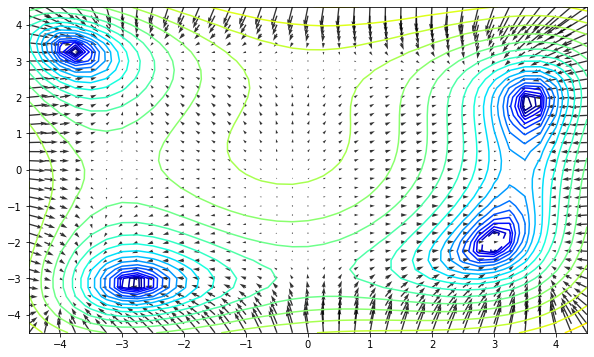

In [ ]:
## Fonction de Himmelblau
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
def H(x):

  x1=x[0]
  x2=x[1]
  return (x1**2-x2-11)**2+(x1+x2**2-7)**2

def dH(x):
  x1=x[0]
  x2=x[1]
  return np.array([4*x1*(x1**2+x2-11)+2*(x1+x2**2-7),2*(x1**2+x2-11)+4*x2*(x1+x2**2-7)])


## Représentation graphique

fig, ax = plt.subplots(figsize=(10, 6))

xmin, xmax, xstep = -4.5, 4.5, .25
ymin, ymax, ystep = -4.5, 4.5, .25

x, y = np.meshgrid(np.arange(xmin, xmax + xstep, xstep), np.arange(ymin, ymax + ystep, ystep))

## Fonction de coût

z = H([x, y])
ax.contour( x, y, z, levels=np.logspace(0,4,30),norm=colors.LogNorm(), cmap=plt.cm.jet)

## Champ de gradient

g = dH([x,y])

ax.quiver(x, y, x-g[0], x-g[1], angles='xy', color='k',alpha=0.8)

$\textbf{Question 2}$ : Compléter la fonction suivante qui implémente l'algorithme de gradient à pas constant présenté en cours $\textbf{à partir de la donnée explicite}$ de $\nabla f$ via l'argument $\texttt{df}$ (correspondant à une fonction).

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import LogNorm

def gradient_std(df, xinit, t, tol=1e-6, Niter=1000):
    xn, hist = xinit, []
    print("valeur initiale",xn)
    for i in range (Niter):
        g=H(x+t*df)
        if ("Nombre d'iterations",i)< tol:
            print
            return xn,hist
        hist.append(...)
        xn=....
        #print("valeur courante",xn)
        #print("norme du gradient", np.linalg.norm(g))
    print("Pas de convergence après", Niter, "itérations")


SyntaxError: ignored

$\textbf{Question 3}$ :  Comment modifier cette fonction afin qu'elle soit utilisable dans des situations où une forme explicite de $\nabla f$ n'est pas donnée ?

In [ ]:
def gradient_std_bis(df, xinit, t, tol=1e-6, Niter=1000):
    xn, hist = xinit, []
    print("valeur initiale",xn)
    for i in range (Niter):
        g= .... ## à changer
        if .... < tol:
            print("Nombre d'iterations",i)
            return xn,hist
        hist.append(...)
        xn=....
        #print("valeur courante",xn)
        #print("norme du gradient", np.linalg.norm(g))
    print("Pas de convergence après", Niter, "itérations")

$\textbf{Question 4}$ : Appliquer la fonction définie à la question 2 à la fonction de Himmelblau et analyser la vitesse de convergence.

In [ ]:
## Création des trajectoires

x0=[2.5, -2.5]
xstar,hist=...
path_=np.array(hist).T

## Représentation des trajectoires

fig, ax = plt.subplots(figsize=(10, 6))

xmin, xmax, xstep = 0.0, 4.5, .25
ymin, ymax, ystep = -4.5, 0.0, .25

x, y = np.meshgrid(np.arange(xmin, xmax + xstep, xstep), np.arange(ymin, ymax + ystep, ystep))

## Fonction de coût

z = ....

ax.contour(x, y, z, levels=np.logspace(0, 5, 25), norm=LogNorm(), cmap=plt.cm.jet)

## Suite produite par l'algorithme

....

$\textbf{Question 5}$ : Etudier numériquement la vitesse de convergence de l'algorithme

In [ ]:
N = len(hist)
nn = range(N)
errors=[.... for xn in hist]#|xn-x*|
plt.semilogy(..., ....) # plot en échelle logarithmique

p = np.polyfit(nn, np.log(errors), 1)
print("Convergence linéaire à taux %.3f"%np.exp(p[0]))

## 2. Algorithme de gradient à pas optimal

$\textbf{Question 7}$ : Compléter la fonction suivante qui implémente l'algorithme de gradient à pas optimal présenté en cours à partir de la donnée explicite de $f$ et $\nabla f$ via l'argument $\texttt{df}$ (correspondant à une fonction).

Pour minimiser la fonction 1d, on fera appel à la fonction $\texttt{minimize}$\_$\texttt{scalar}$.

In [ ]:
from scipy.optimize import minimize_scalar

def gradient_pas_optimal(f,df, xinit, tol=1e-8, Niter=5000):
    xn, hist = xinit, []
    for i in range (Niter):
        g=df(xn)
        #print("norme du gradient", np.linalg.norm(g) )
        if np.linalg.norm(g)< tol:
            print("check")
            return xn,hist
        else:
            hist.append(xn)
            # Determination du pas optimal (via brent)
            def q(t):
                #print("test 1",x)
                #print("test 1",g)

                return f(xn+t*g)
            res=minimize_scalar(q)
            ts = res.x
            print("TS iS",ts)
            #optimisation standard
            xn=xn-ts*g
    print("Pas de convergence après", N, "itérations")

$\textbf{Question 8}$ : Appliquer la fonction définie à la question 7 à la fonction de Himmelblau et analyser la vitesse de convergence.

In [ ]:
## Création des trajectoires

x0=[2.5, -2.5]
xstar,hist= gradient_pas_optimal(H,dH, x0 ,tol=1e-08,Niter=5000)
path_=np.array(hist).T

## Représentation des trajectoires

fig, ax = plt.subplots(figsize=(10, 6))

xmin, xmax, xstep = -4.5, 4.5, .25
ymin, ymax, ystep = -4.5, 4.5, .25

x, y = np.meshgrid(np.arange(xmin, xmax + xstep, xstep), np.arange(ymin, ymax + ystep, ystep))

## Fonction de coût

z = H([x, y])

ax.contour(x, y, z, levels=np.logspace(0, 5, 25), norm=LogNorm(), cmap=plt.cm.jet)

## Suite produite par l'algorithme

ax.quiver(path_[0,:-1], path_[1,:-1], path_[0,1:]-path_[0,:-1], path_[1,1:]-path_[1,:-1],  angles='xy', scale=5, color='k', alpha=1)

$\textbf{Question 9}$ :

a) Etudier numériquement la vitesse de convergence de l'algorithme dans la situation précédente.

b) Commenter les résultats obtenus.

In [ ]:
N = len(hist)
nn = range(N)
errors=[... for xn in hist]#|xn-x*|
plt.semilogy(.., ...) # plot en échelle logarithmique

p = np.polyfit(nn, np.log(errors), 1)
print("Convergence linéaire à taux %.3f"%np.exp(p[0]))